In [1]:
### okay, now we move onto performing experiments on RQ6


In [1]:
%load_ext autoreload
%autoreload 2


import sys
sys.path.append('/nethome/jbang36/eko')


## cherry960
video_name = 'cherry960'

from eko_paper2022.motivation.main import *

images = load_dataset(video_name)


11-27-2022 15:30:39 [info:049]INFO : meta data of the video /srv/data/jbang36/video_data/cherry960/video.mp4 is (100000, 540, 960, 3)
meta data of the video /srv/data/jbang36/video_data/cherry960/video.mp4 is (100000, 540, 960, 3)
100%|██████████| 100000/100000 [01:46<00:00, 941.49it/s]


In [2]:
#### 


images.shape

(100000, 540, 960, 3)

In [3]:
#### we have fixed the code, let's go and run it.

category = 'car'


### run eko on the two categories | use Q2 as to see how the f1-score changes
anchor_count = int( len(images) * 0.1) ### this is the variable
anchor_per = 0.5
dnn_invocation = int(len(images) * 0.1)





In [4]:

from eko_paper2022.experiments.main import execute_ekomab
c_param = 2
eko_mab = execute_ekomab(images, video_name, keep = True, category = category, nb_buckets = anchor_count, anchor_percentage = anchor_per, c_param = c_param)


index initializing....
number of training instances:  1
mining complete!
training complete!
inferring complete!
returning 6240 frames in 0.4886644557118416 seconds
adfasdfasdfsaf 7488 0.5 3744
total number of iframes:  6240
total number of anchors selected in index construction:  3744
final number that has been selected:  3744
bucketing complete!


Target DNN Invocations:   0%|          | 0/3744 [00:00<?, ?it/s]

In [5]:
from eko_paper2022.experiments.main import *

precision, recall = query_process_precision(eko_mab, dnn_invocation = dnn_invocation)
print(precision, recall)


100%|██████████| 3744/3744 [00:14<00:00, 258.74it/s]


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

0.9562262225109028 0.9106393319489241


In [6]:
reps = eko_mab.reps
base_reps = eko_mab.base_reps

len(reps), len(base_reps)

(7488, 7488)

In [7]:
### change the category

category = 'bus'

eko_mab.update_category(category)

In [8]:
from eko_paper2022.experiments.main import *

precision, recall = query_process_precision(eko_mab, dnn_invocation = dnn_invocation)
print(precision, recall)


0it [00:00, ?it/s]


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

0.5375502905677246 0.5716662705015451


### what happens, if we use EKO but refresh....??



In [3]:

category = 'car'


### run eko on the two categories | use Q2 as to see how the f1-score changes
anchor_count = int( len(images) * 0.1) ### this is the variable
anchor_per = 0.5
dnn_invocation = int(len(images) * 0.1)


from eko_paper2022.experiments.main import execute_ekomab
c_param = 2
eko_mab = execute_ekomab(images, video_name, keep = False, category = category, nb_buckets = anchor_count, anchor_percentage = anchor_per, c_param = c_param)
from eko_paper2022.experiments.main import *

precision, recall = query_process_precision(eko_mab, dnn_invocation = dnn_invocation)
print(precision, recall)



index initializing....
number of training instances:  1
mining complete!
training complete!
inferring complete!
returning 8334 frames in 0.39962147548794746 seconds
adfasdfasdfsaf 10000 0.5 5000
total number of iframes:  8334
total number of anchors selected in index construction:  5000
final number that has been selected:  5000
bucketing complete!


Target DNN Invocations:   0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [00:34<00:00, 146.78it/s]


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

0.9529395218002813 0.94066196479147


In [4]:
reps = eko_mab.reps
base_reps = eko_mab.base_reps

len(reps), len(base_reps)

(10000, 5000)

In [5]:
### change the category

category = 'bus'

eko_mab.update_category(category)

In [7]:
from eko_paper2022.experiments.main import *

precision, recall = query_process_precision(eko_mab, dnn_invocation = dnn_invocation)
print(precision, recall)


100%|██████████| 5000/5000 [00:33<00:00, 150.95it/s]


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

0.5381344671804411 0.791015625


#### Perform the experiment on Tasti

In [9]:
### anchor count

anchor_count

dnn_invocation

7488

In [10]:
#### run on car first

from eko_paper2022.motivation.main import execute_tastipt

category = 'car'

tastipt = execute_tastipt(images, video_name, category = category, redo = False, image_size = 224, nb_buckets = anchor_count)
precision, recall = query_process_precision(tastipt, dnn_invocation = dnn_invocation)


Image size is  224
index initializing....
number of training instances:  3000
Image size is  224
mining complete!
Image size is  224
training complete!
inferring complete!


100%|██████████| 74880/74880 [00:13<00:00, 5581.54it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/7488 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

In [11]:
precision, recall

(0.946637775026193, 0.8782529934166925)

In [12]:
category = 'bus'

tastipt = execute_tastipt(images, video_name, category = category, redo = False, image_size = 224, nb_buckets = anchor_count)
precision, recall = query_process_precision(tastipt, dnn_invocation = dnn_invocation)
precision, recall

Image size is  224
index initializing....
number of training instances:  3000
Image size is  224
mining complete!
Image size is  224
training complete!
inferring complete!


100%|██████████| 74880/74880 [00:12<00:00, 6044.94it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/7488 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

(0.44025790852307073, 0.5193724744473497)

In [8]:
### log the derived data

eko_cherry_q2 = [(0.95, 0.95), (0.52, 0.71)]
eko_update_cherry_q2 = [(0.95, 0.95), (0.55, 0.79)]
tasti_cherry_q2 = [(0.94, 0.91), (0.51, 0.83)]



eko_dashcam_q2 = [(0.96, 0.91), (0.54, 0.57)]
eko_update_dashcam_q2 = [(0.96, 0.91), (0.6, 0.6)]
tasti_dashcam_q2 = [(0.95, 0.88), (0.44, 0.52)]


In [9]:
### get the f1_scores

def f1_score2(arr):
    result = []
    for p,r in arr:
        result.append( 2 * p * r / (p + r) )
        
    return np.array(result)


In [10]:
eko_cherry_q2 = f1_score2(eko_cherry_q2)
eko_update_cherry_q2 = f1_score2(eko_update_cherry_q2)
tasti_cherry_q2 = f1_score2(tasti_cherry_q2)

eko_dashcam_q2 = f1_score2(eko_dashcam_q2)
eko_update_dashcam_q2 = f1_score2(eko_update_dashcam_q2)
tasti_dashcam_q2 = f1_score2(tasti_dashcam_q2)

In [17]:
eko_cherry_q2, eko_update_cherry_q2, tasti_cherry_q2

(array([       0.95,     0.60033]),
 array([       0.95,     0.64851]),
 array([    0.92476,     0.63179]))

In [19]:
eko_dashcam_q2, eko_update_dashcam_q2, tasti_dashcam_q2

(array([    0.93433,     0.55459]),
 array([    0.93433,         0.6]),
 array([    0.91366,     0.47667]))

<ipython-input-18-068be8f7fbe1>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(x_axis_names, rotation_mode='anchor')


NameError: name 'dashcam_ic' is not defined

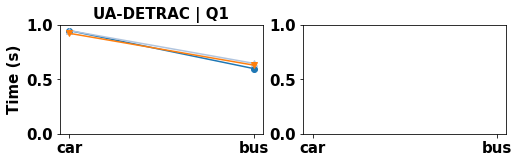

In [18]:

#### now we make the figure,,,... 


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

font = {
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=15)


x_axis_names = ['car', 'bus']

x = np.arange(len(x_axis_names))


### we need to do subplots
rows = 1
columns = 2
fig_size = (8, 2)
fig, axes = plt.subplots(rows, columns, sharey = False, sharex=True, figsize=fig_size)


i = 0
width = 0.6

axes[i].plot(x_axis_names, eko_cherry_q2,  marker = 'o', label='EKO REUSE')
axes[i].plot(x_axis_names, eko_update_cherry_q2, marker = '^', label = 'EKO', color = 'lightsteelblue')
axes[i].plot(x_axis_names, tasti_cherry_q2, marker = 'v', label='TASTI-PT')
axes[i].set_ylabel('Time (s)', weight = 'bold', size = 15)
axes[i].set_ylim(0, 1)
#axes[i][j].set_yticks([0, 50, 100, 150, 200])

axes[i].set_xticklabels(x_axis_names, rotation_mode='anchor')
#plt.ylim(0, 2)
#plt.xticks(x, x_axis_names)
axes[i].set_title('UA-DETRAC | Q1', weight = 'bold', size = 15)


i = 1

axes[i].bar(x_axis_names, dashcam_ic, width, label='Index Construction')
axes[i].bar(x_axis_names, dashcam_q, width, bottom = dashcam_ic, label='Query Execution', color = 'lightsteelblue')
axes[i].set_xticklabels(x_axis_names, rotation = 30, ha = 'right', rotation_mode='anchor')
#axes[i][j].set_ylabel('Time (s)', weight = 'bold', size = 15)
axes[i].set_title('Dashcam | Q1', weight = 'bold', size = 15)

axes[i].set_xticklabels(x_axis_names, rotation_mode='anchor')





plt.tight_layout()

lgd = axes[0].legend(loc='upper center', bbox_to_anchor=(1, 1.6),
          fancybox=True, shadow=True, ncol=10)


#plt.legend()
plt.savefig('plots/rq4.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

